In [1]:
import tensorflow as tf
import tensorflow_addons as tfa
from augmentation_2d import *
import matplotlib.pyplot as plt
from icecream import ic

In [2]:
def get_mnist(dataset=tf.keras.datasets.fashion_mnist.load_data, val_split=None, normalise_factor=255.0):
    (x_train, y_train), (x_test, y_test) = dataset()
    x_train = x_train[..., np.newaxis] / normalise_factor
    x_test = x_test[..., np.newaxis] / normalise_factor
    if val_split is not None:
        val_length = int(len(x_train) * val_split)
        x_train, y_train = x_train[:-val_length, ...], y_train[:-val_length, ...]
        x_val, y_val = x_train[-val_length:, ...], y_train[-val_length:, ...]
        x_val = np.float32(x_val)
    else:
        x_val = y_val = None

    x_train = np.float32(x_train)
    x_test = np.float32(x_test)

    train = (x_train, y_train)
    val = (x_val, y_val)
    test = (x_test, y_test)
    return train, val, test

In [3]:
t, v, _ = get_mnist()

In [4]:
tx, ty = t
print(tx.shape)

(60000, 28, 28, 1)


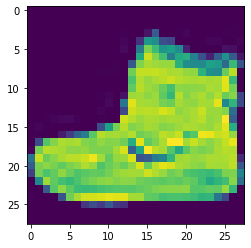

In [5]:
_ = plt.imshow(tx[0])

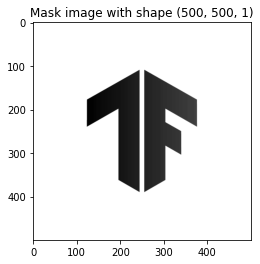

In [6]:
img_path = tf.keras.utils.get_file('tensorflow.png','https://tensorflow.org/images/tf_logo.png')
img_raw = tf.io.read_file(img_path)
img = tf.io.decode_image(img_raw)
img = tf.image.convert_image_dtype(img, tf.float32)
img = tf.image.resize(img, [500,500])
bw_img = tf.image.rgb_to_grayscale(img)
plt.title("Mask image with shape {}".format(bw_img.shape))
_ = plt.imshow(bw_img[...,0], cmap='gray')

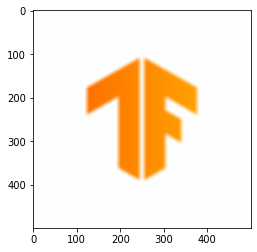

In [7]:
mean_og = tfa.image.mean_filter2d(img, filter_shape=11)
_ = plt.imshow(mean_og)

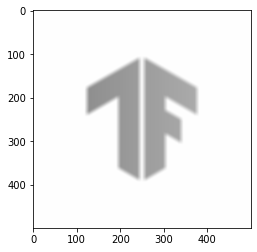

In [8]:
bw_img_rgb = tf.image.grayscale_to_rgb(bw_img)
bw_img_rgb = tf.expand_dims(bw_img_rgb, axis=0)
mean_bw = tfa.image.mean_filter2d(bw_img_rgb, filter_shape=11)
_ = plt.imshow(mean_bw[0])

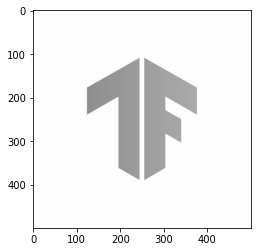

In [9]:
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0])
_ = plt.imshow(transform[0])

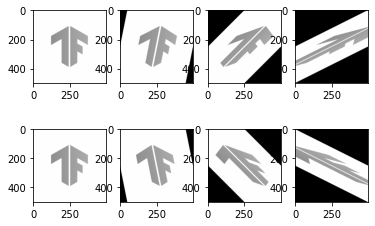

In [10]:
## skew x
fig, axs = plt.subplots(2, 4)

factor = 1e3
transform = tfa.image.transform(bw_img_rgb, [1.0, 1.0/factor, -250/factor, 0.0, 1.0, 0.0, 0.0, 0.0])
axs[0][0].imshow(transform[0])

factor = 5
transform = tfa.image.transform(bw_img_rgb, [1.0, 1.0/factor, -250/factor, 0.0, 1.0, 0.0, 0.0, 0.0])
axs[0][1].imshow(transform[0])

factor = 1
transform = tfa.image.transform(bw_img_rgb, [1.0, 1.0/factor, -250/factor, 0.0, 1.0, 0.0, 0.0, 0.0])
axs[0][2].imshow(transform[0])

factor = 0.5
transform = tfa.image.transform(bw_img_rgb, [1.0, 1.0/factor, -250/factor, 0.0, 1.0, 0.0, 0.0, 0.0])
axs[0][3].imshow(transform[0])

factor = -1e3
transform = tfa.image.transform(bw_img_rgb, [1.0, 1.0/factor, -250/factor, 0.0, 1.0, 0.0, 0.0, 0.0])
axs[1][0].imshow(transform[0])

factor = -5
transform = tfa.image.transform(bw_img_rgb, [1.0, 1.0/factor, -250/factor, 0.0, 1.0, 0.0, 0.0, 0.0])
axs[1][1].imshow(transform[0])

factor = -1
transform = tfa.image.transform(bw_img_rgb, [1.0, 1.0/factor, -250/factor, 0.0, 1.0, 0.0, 0.0, 0.0])
axs[1][2].imshow(transform[0])

factor = -0.5
transform = tfa.image.transform(bw_img_rgb, [1.0, 1.0/factor, -250/factor, 0.0, 1.0, 0.0, 0.0, 0.0])
axs[1][3].imshow(transform[0])

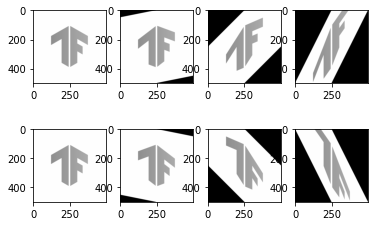

In [11]:
## skew y
fig, axs = plt.subplots(2, 4)

factor = 1e3
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 1.0/factor, 1.0, -250/factor, 0.0, 0.0])
axs[0][0].imshow(transform[0])

factor = 5
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 1.0/factor, 1.0, -250/factor, 0.0, 0.0])
axs[0][1].imshow(transform[0])

factor = 1
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 1.0/factor, 1.0, -250/factor, 0.0, 0.0])
axs[0][2].imshow(transform[0])

factor = 0.5
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 1.0/factor, 1.0, -250/factor, 0.0, 0.0])
axs[0][3].imshow(transform[0])

factor = -1e3
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 1.0/factor, 1.0, -250/factor, 0.0, 0.0])
axs[1][0].imshow(transform[0])

factor = -5
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 1.0/factor, 1.0, -250/factor, 0.0, 0.0])
axs[1][1].imshow(transform[0])

factor = -1
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 1.0/factor, 1.0, -250/factor, 0.0, 0.0])
axs[1][2].imshow(transform[0])

factor = -0.5
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 1.0/factor, 1.0, -250/factor, 0.0, 0.0])
axs[1][3].imshow(transform[0])

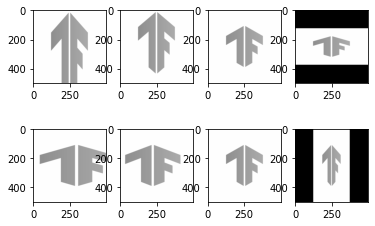

In [12]:
fig, axs = plt.subplots(2, 4)

factor = 2
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0/factor, 100, 0.0, 0.0])
axs[0][0].imshow(transform[0])

factor = 1.5
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0/factor, 100, 0.0, 0.0])
axs[0][1].imshow(transform[0])

factor = 1
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0/factor, 0.0, 0.0, 0.0])
axs[0][2].imshow(transform[0])

factor = 0.5
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0/factor, -250, 0.0, 0.0])
axs[0][3].imshow(transform[0])

factor = 2
transform = tfa.image.transform(bw_img_rgb, [1.0/factor, 0.0, 100, 0.0, 1.0, 0.0, 0.0, 0.0])
axs[1][0].imshow(transform[0])

factor = 1.5
transform = tfa.image.transform(bw_img_rgb, [1.0/factor, 0.0, 100, 0.0, 1.0, 0.0, 0.0, 0.0])
axs[1][1].imshow(transform[0])

factor = 1
transform = tfa.image.transform(bw_img_rgb, [1.0/factor, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0])
axs[1][2].imshow(transform[0])

factor = 0.5
transform = tfa.image.transform(bw_img_rgb, [1.0/factor, 0.0, -250, 0.0, 1.0, 0.0, 0.0, 0.0])
axs[1][3].imshow(transform[0])

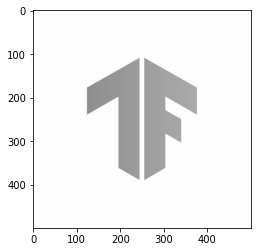

In [13]:
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0, 1.0, 0, 0.0, 0.0])
_ = plt.imshow(transform[0])

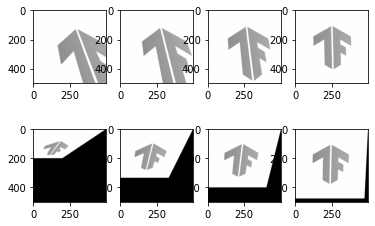

In [14]:
## weird skew x
fig, axs = plt.subplots(2, 4)

factor = 1.5e-3
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, factor * 1.0])
axs[0][0].imshow(transform[0])

factor = 1e-3
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, factor * 1.0])
axs[0][1].imshow(transform[0])

factor = 5e-4
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, factor * 1.0])
axs[0][2].imshow(transform[0])

factor = 1e-4
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, factor * 1.0])
axs[0][3].imshow(transform[0])

factor = -3e-3
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, factor * 1.0])
axs[1][0].imshow(transform[0])

factor = -1e-3
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, factor * 1.0])
axs[1][1].imshow(transform[0])

factor = -5e-4
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, factor * 1.0])
axs[1][2].imshow(transform[0])

factor = -1e-4
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, factor * 1.0])
axs[1][3].imshow(transform[0])

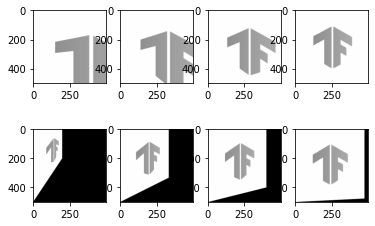

In [15]:
## weird skew y
fig, axs = plt.subplots(2, 4)

factor = 1.5e-3
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, factor * 1.0, 0.0])
axs[0][0].imshow(transform[0])

factor = 1e-3
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, factor * 1.0, 0.0])
axs[0][1].imshow(transform[0])

factor = 5e-4
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, factor * 1.0, 0.0])
axs[0][2].imshow(transform[0])

factor = 1e-4
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, factor * 1.0, 0.0])
axs[0][3].imshow(transform[0])

factor = -3e-3
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, factor * 1.0, 0.0])
axs[1][0].imshow(transform[0])

factor = -1e-3
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, factor * 1.0, 0.0])
axs[1][1].imshow(transform[0])

factor = -5e-4
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, factor * 1.0, 0.0])
axs[1][2].imshow(transform[0])

factor = -1e-4
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, factor * 1.0, 0.0])
axs[1][3].imshow(transform[0])

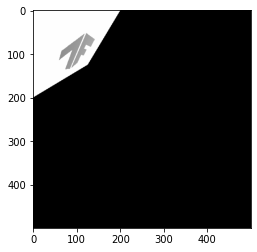

In [16]:
factor = -3e-3
transform = tfa.image.transform(bw_img_rgb, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, factor * 1.0, factor * 1.0])
_ = plt.imshow(transform[0])

tf.Tensor([[  1.   0.   1.   0.   1. 100.   0.   0.]], shape=(1, 8), dtype=float32)


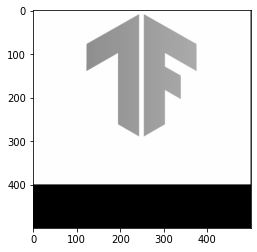

In [17]:
t = tfa.image.translations_to_projective_transforms([-1, -100])
print(t)
transform = tfa.image.transform(bw_img_rgb, t)
_ = plt.imshow(transform[0])

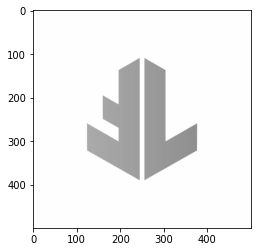

In [18]:
transform = tfa.image.rotate(bw_img_rgb, [3.14])
_ = plt.imshow(transform[0])

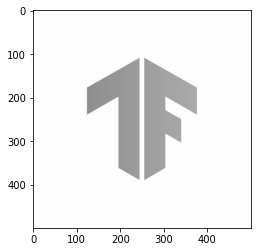

In [19]:
transform = tfa.image.sharpness(bw_img_rgb, 1)
_ = plt.imshow(transform[0])

(1, 500, 500, 3)


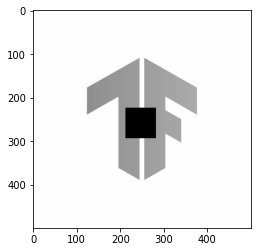

In [20]:
print(bw_img_rgb.shape)
transform = tfa.image.random_cutout(bw_img_rgb, (70,70), constant_values = 0)
_ = plt.imshow(transform[0])

In [52]:
bw_img.shape

TensorShape([500, 500, 1])

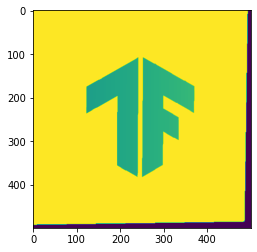

In [53]:
import cv2 as cv
# img = cv.imread('IMG_3509.jpg', 0) 
# nimg = img
# img = img[np.newaxis, ...]
# img = img[..., np.newaxis]

nimg = bw_img
nimg = nimg[:,:,0].astype('uint8')
img = bw_img[np.newaxis, ...]

factor = -3e-5
transform = tfa.image.transform(img, [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, factor * 1.0, factor * 1.0])
_ = plt.imshow(transform[0])
timg = transform.numpy()[0,:,:,0].astype('uint8')

In [54]:
ic(nimg.shape)
ic(nimg.dtype)

ic(timg.shape)
ic(timg.dtype)

ic| nimg.shape: TensorShape([500, 500])
ic| nimg.dtype: tf.float32
ic| timg.shape: (500, 500)
ic| timg.dtype: dtype('uint8')


dtype('uint8')

In [55]:
sift = cv.SIFT_create()

ic(nimg.shape, timg.shape)
kp1, des1 = sift.detectAndCompute(nimg,None)
kp2, des2 = sift.detectAndCompute(timg,None)

ic(len(kp1))
ic(len(kp2))

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

ic(len(matches))
ic(len(good))

ic| nimg.shape: TensorShape([500, 500]), timg.shape: (500, 500)


TypeError: Expected Ptr<cv::UMat> for argument 'image'

In [50]:
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
print(M)
matchesMask = mask.ravel().tolist()

h,w = nimg.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv.perspectiveTransform(pts,M)

img2 = cv.polylines(timg,[np.int32(dst)],True,255,10, cv.LINE_AA)

[[ 9.99922010e-01  5.38468810e-05  4.96838887e-02]
 [-1.29806554e-05  1.00002181e+00  3.55650035e-03]
 [ 2.99572945e-05  3.00244902e-05  1.00000000e+00]]


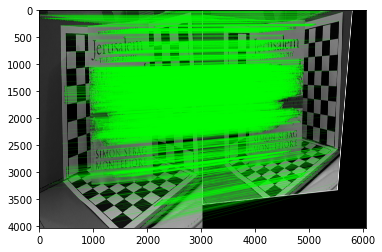

In [51]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                    singlePointColor = None,
                    matchesMask = matchesMask, # draw only inliers
                    flags = 2)

img3 = cv.drawMatches(nimg,kp1,timg,kp2,good,None,**draw_params)

plt.imshow(img3, 'gray')
plt.show()